In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import pmdarima as pm
from pmdarima import auto_arima
from math import sqrt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor


import os
import warnings
from dataclasses import dataclass
from typing import List, Dict, Tuple


from IPython.display import Image

In [188]:
import lightgbm as lgb
print(lgb.__version__)

4.6.0


In [261]:
df_merged = pd.read_csv('merged_hydro_climate.csv')

In [262]:
df_merged.head(5)

,date_time,Source,current_mean,current_max,current_std,power_factor_mean,kwh_sum,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),...,Snowfall (mm),Snow Cover (%),date,time,consumer_device,data_user,voltage_value,is_red,is_blue,is_yellow
0,2023-06-03 13:00:00,consumer_device_3_data_user_11,0.0,0.0,0.0,0.0,0.0,7.199731,-2.448126,-0.034195,...,0.0,99.972656,2023-06-03,13:00:00,consumer_device_3,11,0.0,0,0,1
1,2023-06-03 13:00:00,consumer_device_3_data_user_3,0.0,0.0,0.0,0.0,0.0,7.199731,-2.448126,-0.034195,...,0.0,99.972656,2023-06-03,13:00:00,consumer_device_3,3,0.0,1,0,0
2,2023-06-03 13:00:00,consumer_device_3_data_user_6,0.0,0.0,0.0,0.0,0.0,7.199731,-2.448126,-0.034195,...,0.0,99.972656,2023-06-03,13:00:00,consumer_device_3,6,0.0,0,1,0
3,2023-06-03 13:00:00,consumer_device_3_data_user_10,0.0,0.0,0.0,0.0,0.0,7.199731,-2.448126,-0.034195,...,0.0,99.972656,2023-06-03,13:00:00,consumer_device_3,10,0.0,1,0,0
4,2023-06-03 13:00:00,consumer_device_3_data_user_5,0.0,0.0,0.0,0.0,0.0,7.199731,-2.448126,-0.034195,...,0.0,99.972656,2023-06-03,13:00:00,consumer_device_3,5,0.0,0,0,1


In [191]:
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

In [192]:
df_merged.tail(5)

,date_time,Source,current_mean,current_max,current_std,power_factor_mean,kwh_sum,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),...,Snowfall (mm),Snow Cover (%),date,time,consumer_device,data_user,voltage_value,is_red,is_blue,is_yellow
3262636,2024-09-23 23:00:00,consumer_device_6_data_user_7,0.000000,0.00,0.000000,0.000000,0.000000,4.977533,0.843713,0.055191,...,0.0,0.0,2024-09-23,23:00:00,consumer_device_6,7,0.0000,0,1,0
3262637,2024-09-23 23:00:00,consumer_device_10_data_user_3,0.107500,0.11,0.004523,0.385000,0.008021,4.977533,0.843713,0.055191,...,0.0,0.0,2024-09-23,23:00:00,consumer_device_10,3,197.6050,0,0,1
3262638,2024-09-23 23:00:00,consumer_device_35_data_user_6,1.715000,1.94,0.169196,0.833333,0.286159,4.977533,0.843713,0.055191,...,0.0,0.0,2024-09-23,23:00:00,consumer_device_35,6,199.5425,1,0,0
3262639,2024-09-23 23:00:00,consumer_device_31_data_user_6,0.000000,0.00,0.000000,0.000000,0.000000,4.977533,0.843713,0.055191,...,0.0,0.0,2024-09-23,23:00:00,consumer_device_31,6,0.0000,0,1,0
3262640,2024-09-23 23:00:00,consumer_device_12_data_user_3,0.943333,1.01,0.055814,0.367500,0.065902,4.977533,0.843713,0.055191,...,0.0,0.0,2024-09-23,23:00:00,consumer_device_12,3,185.9750,0,0,1


In [193]:
df_merged.columns

Index(['date_time', 'Source', 'current_mean', 'current_max', 'current_std',
       'power_factor_mean', 'kwh_sum', 'Temperature (°C)',
       'Dewpoint Temperature (°C)', 'U Wind Component (m/s)',
       'V Wind Component (m/s)', 'Total Precipitation (mm)', 'Snowfall (mm)',
       'Snow Cover (%)', 'date', 'time', 'consumer_device', 'data_user',
       'voltage_value', 'is_red', 'is_blue', 'is_yellow'],
      dtype='object')

In [263]:
df_power = pd.read_csv('consumer_devices.csv')

In [ ]:
df_power.tail(5)

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_9,consumer_device_x,active_phases,time_delta_hours,kwh_estimated,residual,match
39147554,2024-09-14 05:15:00,0.0,0.0,0.0,0.0,consumer_device_9_data_user_9,NaN,NaN,1,9,1,0.083333,0.0,0.0,True
39147555,2024-09-14 05:20:00,0.0,0.0,0.0,0.0,consumer_device_9_data_user_9,NaN,NaN,1,9,1,0.083333,0.0,0.0,True
39147556,2024-09-14 05:25:00,0.0,0.0,0.0,0.0,consumer_device_9_data_user_9,NaN,NaN,1,9,1,0.083333,0.0,0.0,True
39147557,2024-09-14 05:30:00,0.0,0.0,0.0,0.0,consumer_device_9_data_user_9,NaN,NaN,1,9,1,0.083333,0.0,0.0,True
39147558,2024-09-14 05:35:00,0.0,0.0,0.0,0.0,consumer_device_9_data_user_9,NaN,NaN,1,9,1,0.083333,0.0,0.0,True


In [ ]:
df_power.columns

Index(['date_time', 'v_red', 'current', 'power_factor', 'kwh', 'Source',
       'v_blue', 'v_yellow', 'consumer_device_9', 'consumer_device_x'],
      dtype='object')

In [264]:
# Ensure datetime is in proper format
df_power['date_time'] = pd.to_datetime(df_power['date_time'])

In [ ]:
# Count how many phase columns are non-null per row
df_power['active_phases'] = df_power[['v_red', 'v_blue', 'v_yellow']].notnull().sum(axis=1)

# Check distribution of active phases
phase_counts = df_power['active_phases'].value_counts().sort_index()
print("Number of active phases per row:")
print(phase_counts)

# Count rows where none of the phases are active
num_inactive = (df_power['active_phases'] == 0).sum()
print(f"\nNumber of rows with no active phases (all NaN): {num_inactive}")

# Check if single-phase data
if phase_counts.index.max() == 1:
    print("\nConfirmed: Each row has exactly one active phase (single-phase recording).")
else:
    print("\nSome rows have more than one phase active at the same time.")

# Check rows with more than 1 active phase
multi_phase_rows = df_power[df_power['active_phases'] > 1]
if not multi_phase_rows.empty:
    print("\nRows with multiple active phases detected:")
    print(multi_phase_rows[['date_time','v_red','v_blue','v_yellow']].head(10))

# Check rows with zero active phases
inactive_rows = df_power[df_power['active_phases'] == 0]
if not inactive_rows.empty:
    print("\nRows with no active phases (all NaN):")
    print(inactive_rows[['date_time','v_red','v_blue','v_yellow']].head(10))


Number of active phases per row:
active_phases
1    39147559
Name: count, dtype: int64

Number of rows with no active phases (all NaN): 0

Confirmed: Each row has exactly one active phase (single-phase recording).


In [ ]:
df_power = df_power.copy()

# Datetime to sort
df_power = df_power.sort_values('date_time').reset_index(drop=True)

# Time in hours
df_power['time_delta_hours'] = df_power['date_time'].diff().dt.total_seconds() / 3600

# Safely set the first row
df_power.loc[0, 'time_delta_hours'] = 5 / 60  # 0.08333 hours

# Extreme deltas
df_power['time_delta_hours'] = df_power['time_delta_hours'].clip(lower=0.001, upper=0.2)

# Estimated kWh for each interval
df_power['kwh_estimated'] = (df_power['active_phases'] * df_power['current'] * df_power['power_factor'] * df_power['time_delta_hours']) / 1000

# Residuals
df_power['residual'] = df_power['kwh'] - df_power['kwh_estimated']

# Check matches
tolerance = 0.01
df_power['match'] = np.isclose(df_power['kwh'], df_power['kwh_estimated'], atol=tolerance)

num_correct = df_power['match'].sum()
num_incorrect = (~df_power['match']).sum()

print(f"Number of rows where formula is correct: {num_correct}")
print(f"Number of rows where formula is incorrect: {num_incorrect}")


Number of rows where formula is correct: 38131215
Number of rows where formula is incorrect: 1016344


Number of active phases per row:
active_phases
1    39147559
 Number of rows where formula is correct: 38132014
 Number of rows where formula is incorrect: 1015545

Active rows: 39,147,559 (rows with at least one phase voltage)
Correct kWh estimates: 38,132,014 (~97.4%)
Incorrect kWh estimates: 1,015,545 (~2.6%)

In [ ]:
# Define a tolerance for matching (e.g., 0.01 kWh)
tolerance = 0.01

# Count rows where the estimated kWh matches the actual kWh within the tolerance
df_power['match'] = np.isclose(df_power['kwh'], df_power['kwh_estimated'], atol=tolerance)

# Number of correct and incorrect rows
num_correct = df_power['match'].sum()
num_incorrect = (~df_power['match']).sum()

print(f"Number of rows where formula is correct: {num_correct}")
print(f"Number of rows where formula is incorrect: {num_incorrect}")


Number of rows where formula is correct: 38131215
Number of rows where formula is incorrect: 1016344


Moved from hourly to Daily forecasting

In [265]:
df_daily_merged = pd.read_csv('daily_merged_hydro_climate.csv')

In [ ]:
df_daily_merged.head(5)

,date,Source,current_mean,current_max,current_std,power_factor_mean,kwh_sum,Temperature (°C)_mean,Temperature (°C)_min,Temperature (°C)_max,...,V Wind Component (m/s)_mean,Total Precipitation (mm)_sum,Snowfall (mm)_sum,Snow Cover (%)_mean,consumer_device,data_user,voltage_value,is_red,is_blue,is_yellow
0,2023-06-03,consumer_device_3_data_user_9,0.000576,0.08,0.006786,0.005324,0.000922,1.86028,-1.513861,7.199731,...,-0.657726,0.004557,0.0,99.972656,consumer_device_3,9,1.344820,0,0,1
1,2023-06-03,consumer_device_3_data_user_4,0.000647,0.09,0.007634,0.005468,0.001066,1.86028,-1.513861,7.199731,...,-0.657726,0.004557,0.0,99.972656,consumer_device_3,4,1.344820,0,1,0
2,2023-06-03,consumer_device_3_data_user_3,0.000719,0.10,0.008482,0.005468,0.001183,1.86028,-1.513861,7.199731,...,-0.657726,0.004557,0.0,99.972656,consumer_device_3,3,1.343381,1,0,0
3,2023-06-03,consumer_device_3_data_user_11,0.000647,0.09,0.007634,0.005180,0.001009,1.86028,-1.513861,7.199731,...,-0.657726,0.004557,0.0,99.972656,consumer_device_3,11,1.344820,0,0,1
4,2023-06-03,consumer_device_3_data_user_5,0.000647,0.09,0.007634,0.005612,0.001094,1.86028,-1.513861,7.199731,...,-0.657726,0.004557,0.0,99.972656,consumer_device_3,5,1.344820,0,0,1


In [ ]:
df_daily_merged.columns

Index(['date', 'Source', 'current_mean', 'current_max', 'current_std',
       'power_factor_mean', 'kwh_sum', 'Temperature (°C)_mean',
       'Temperature (°C)_min', 'Temperature (°C)_max',
       'Dewpoint Temperature (°C)_mean', 'Dewpoint Temperature (°C)_min',
       'Dewpoint Temperature (°C)_max', 'U Wind Component (m/s)_mean',
       'V Wind Component (m/s)_mean', 'Total Precipitation (mm)_sum',
       'Snowfall (mm)_sum', 'Snow Cover (%)_mean', 'consumer_device',
       'data_user', 'voltage_value', 'is_red', 'is_blue', 'is_yellow'],
      dtype='object')

In [ ]:
df_daily_merged['date'].dtype

dtype('O')

In [ ]:
df_daily_merged['date'] = pd.to_datetime(df_daily_merged['date'])

In [ ]:
# Check min/max date
print("Dataset covers:", df_daily_merged.index.min(), "to", df_daily_merged.index.max())

# Create full expected daily date range
full_range = pd.date_range(start="2023-06-03", end="2024-09-23", freq="D")

# Compare with your actual dataset index
missing_dates = full_range.difference(df_daily_merged.index)

print("Number of missing days:", len(missing_dates))
print("Missing days:", missing_dates[:20])  # show first 20 if many

Dataset covers: 2023-06-03 00:00:00 to 2024-09-23 00:00:00
Number of missing days: 0
Missing days: DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [ ]:
# Loop through all consumers
sources = df_daily_merged['Source'].unique()
for source in sources:
    df_source = df_daily_merged[df_daily_merged['Source'] == source].copy()
    df_source = df_source.sort_index()
    
    # Create complete daily index
    full_idx = pd.date_range(df_source.index.min(), df_source.index.max(), freq='D')
    df_source = df_source.reindex(full_idx)
    
    # Count missing days
    missing_days = df_source['kwh_sum'].isna().sum()
    if missing_days > 0:
        print(f"Consumer {source} has {missing_days} missing days.")
    else:
        print(f"Consumer {source} has no missing days.")


Consumer consumer_device_3_data_user_9 has no missing days.
Consumer consumer_device_3_data_user_4 has no missing days.
Consumer consumer_device_3_data_user_3 has no missing days.
Consumer consumer_device_3_data_user_11 has no missing days.
Consumer consumer_device_3_data_user_5 has no missing days.
Consumer consumer_device_3_data_user_7 has no missing days.
Consumer consumer_device_3_data_user_1 has no missing days.
Consumer consumer_device_3_data_user_10 has no missing days.
Consumer consumer_device_3_data_user_6 has no missing days.
Consumer consumer_device_3_data_user_2 has no missing days.
Consumer consumer_device_3_data_user_8 has no missing days.
Consumer consumer_device_16_data_user_9 has no missing days.
Consumer consumer_device_16_data_user_18 has no missing days.
Consumer consumer_device_16_data_user_7 has no missing days.
Consumer consumer_device_16_data_user_1 has no missing days.
Consumer consumer_device_16_data_user_8 has no missing days.
Consumer consumer_device_16_data

In [ ]:
# Full daily range for the dataset
full_range = pd.date_range(start="2023-06-03", end="2024-09-23", freq="D")

# Identify climate features
climate_cols = [
    'Temperature (°C)_mean','Temperature (°C)_min','Temperature (°C)_max',
    'Dewpoint Temperature (°C)_mean','Dewpoint Temperature (°C)_min','Dewpoint Temperature (°C)_max',
    'U Wind Component (m/s)_mean','V Wind Component (m/s)_mean',
    'Total Precipitation (mm)_sum','Snowfall (mm)_sum','Snow Cover (%)_mean'
]

def prepare_consumer_data(df, source_name):
    df_source = df[df["Source"] == source_name].copy()
    
    # Reindex on full_range with MultiIndex (Source, date)
    df_source = df_source.reindex(full_range).reset_index()
    df_source = df_source.rename(columns={"index": "date"})
    df_source["Source"] = source_name
    
    # Fill missing target
    df_source["kwh_sum"] = df_source["kwh_sum"].ffill()  # or .fillna(0)
    
    # Fill climate variables
    df_source[climate_cols] = df_source[climate_cols].interpolate().ffill()
    
    return df_source.set_index("date")

# Apply to all sources
sources = df_daily_merged["Source"].unique()
df_cleaned = pd.concat([prepare_consumer_data(df_daily_merged, s) for s in sources])

print("Preprocessing complete. Shape:", df_cleaned.shape)
print("Number of sources:", len(sources))
print("Expected rows per source:", len(full_range))

Preprocessing complete. Shape: (280215, 23)
Number of sources: 585
Expected rows per source: 479


Devices data range: 2023-06-03 12:25:00 to 2024-09-23 23:55:00. 
Climate data range: 2023-06-03 13:00:00 to 2024-10-25 00:00:00. 
Overlap range: 2023-06-03 13:00:00 to 2024-09-23 23:55:00.

Feature Importance / Correlation Check from Dataset

In [368]:
# Aggregate by date (sum kWh, mean climate/device values)
df_agg = df.groupby('date').agg({
    'kwh_sum':'sum',
    'current_mean':'mean',
    'current_max':'max',
    'current_std':'mean',
    'power_factor_mean':'mean',
    'Temperature (°C)_mean':'mean',
    'Temperature (°C)_min':'min',
    'Temperature (°C)_max':'max',
    'Dewpoint Temperature (°C)_mean':'mean',
    'Dewpoint Temperature (°C)_min':'min',
    'Dewpoint Temperature (°C)_max':'max',
    'U Wind Component (m/s)_mean':'mean',
    'V Wind Component (m/s)_mean':'mean',
    'Total Precipitation (mm)_sum':'sum',
    'Snowfall (mm)_sum':'sum',
    'Snow Cover (%)_mean':'mean',
    'voltage_value':'mean',
    'is_red':'sum',
    'is_blue':'sum',
    'is_yellow':'sum',
    'consumer_device':'nunique',
    'data_user':'nunique'
}).rename(columns={'consumer_device':'consumer_count','data_user':'user_count'}).reset_index()

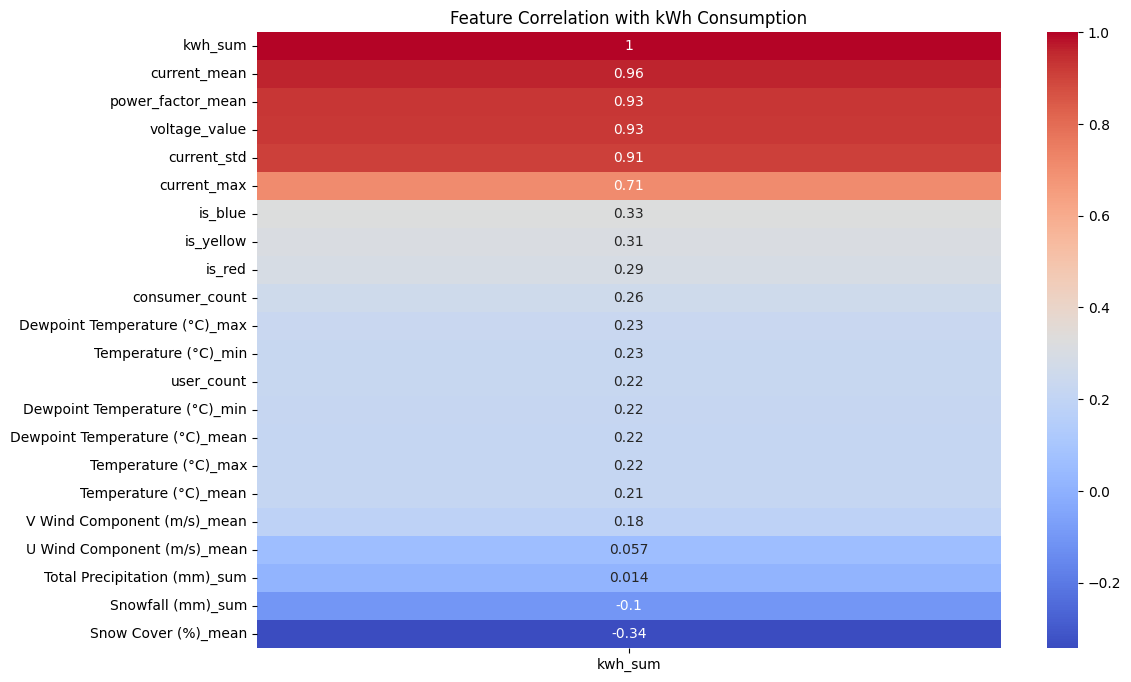

In [369]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df_agg.drop(columns=['date']).corr()
sns.heatmap(corr[['kwh_sum']].sort_values(by='kwh_sum', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with kWh Consumption")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df_agg.drop(['date','kwh_sum'], axis=1)  # all numeric
y = df_agg['kwh_sum']

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)


RandomForestRegressor(n_estimators=200, random_state=42)

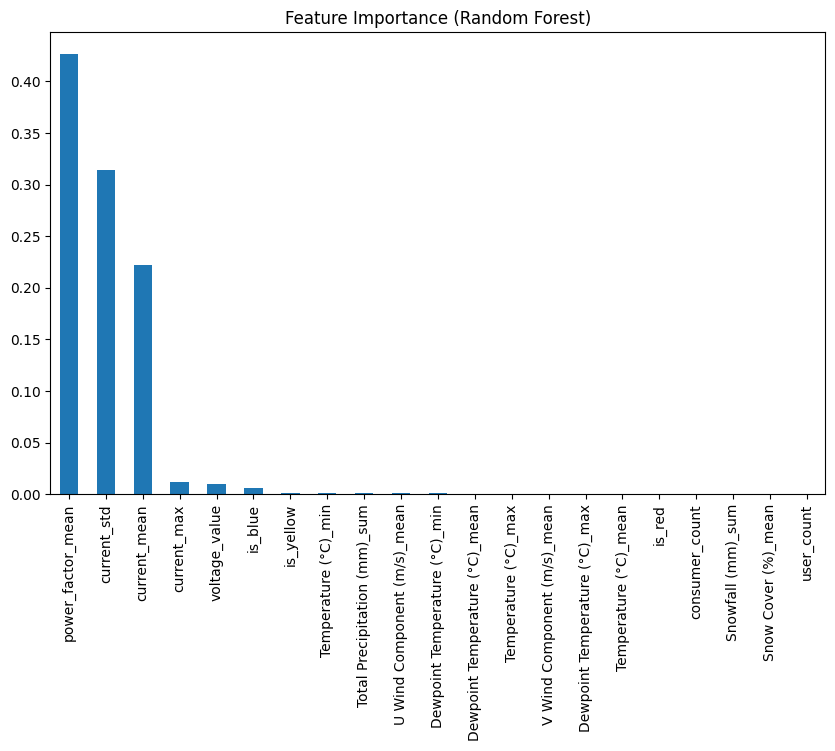

In [ ]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()

Feature Importance Using Random Forest

**Forecasting for an extra month with climate features.

In [58]:
df_climate = pd.read_csv('climate_data.csv')

In [59]:
df_climate.head(5)

,Date Time,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%),i,j,...,q,r,s,t,u,v,w,x,y,z
0,2023-06-03T13:00:00,7.199731,-2.448126,-0.034195,0.060989,0.000377,0.0,99.972656,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-03T14:00:00,6.000620,-2.597540,-0.080688,0.018585,0.000398,0.0,99.972656,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-03T15:00:00,4.789972,-2.696951,0.057449,-0.352020,0.000418,0.0,99.972656,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-03T16:00:00,3.158746,-2.879324,0.051529,-0.608948,0.000420,0.0,99.972656,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-06-03T17:00:00,1.671426,-3.255606,0.056137,-0.739838,0.000420,0.0,99.972656,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_climate = df_climate.drop(columns=['i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])

In [61]:
df_climate.columns

Index(['Date Time', 'Temperature (°C)', 'Dewpoint Temperature (°C)',
       'U Wind Component (m/s)', 'V Wind Component (m/s)',
       'Total Precipitation (mm)', 'Snowfall (mm)', 'Snow Cover (%)'],
      dtype='object')

In [62]:
df_climate['Date Time'] = pd.to_datetime(df_climate['Date Time'])

In [63]:
# Set Date Time as index
df_climate.set_index('Date Time', inplace=True)

# Define aggregation rules
agg_dict = {
    'Temperature (°C)': ['mean', 'min', 'max'],
    'Dewpoint Temperature (°C)': ['mean', 'min', 'max'],
    'U Wind Component (m/s)': 'mean',
    'V Wind Component (m/s)': 'mean',
    'Total Precipitation (mm)': 'sum',
    'Snowfall (mm)': 'sum',
    'Snow Cover (%)': 'mean'
}

# Aggregate by day
df_daily_climate = df_climate.resample('D').agg(agg_dict)

# Flatten MultiIndex columns
df_daily_climate.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_daily_climate.columns]

# Reset index and rename to Date
df_daily_climate = df_daily_climate.reset_index().rename(columns={'Date Time': 'date'})

print(df_daily_climate.head())


        date  Temperature (°C)_mean  Temperature (°C)_min   
0 2023-06-03               1.860280             -1.513861  \
1 2023-06-04               3.992740             -3.258566   
2 2023-06-05               4.794523             -4.962714   
3 2023-06-06               6.304390              0.213861   
4 2023-06-07               7.003922              1.434000   

   Temperature (°C)_max  Dewpoint Temperature (°C)_mean   
0              7.199731                       -3.348664  \
1              9.100580                       -1.905203   
2             10.031442                       -3.781657   
3             11.149500                       -4.670615   
4             12.092218                       -3.965763   

   Dewpoint Temperature (°C)_min  Dewpoint Temperature (°C)_max   
0                      -4.697501                      -2.448126  \
1                      -5.135535                       0.460703   
2                      -6.197546                      -1.211890   
3         

In [64]:
df_daily_climate.tail(5)

,date,Temperature (°C)_mean,Temperature (°C)_min,Temperature (°C)_max,Dewpoint Temperature (°C)_mean,Dewpoint Temperature (°C)_min,Dewpoint Temperature (°C)_max,U Wind Component (m/s)_mean,V Wind Component (m/s)_mean,Total Precipitation (mm)_sum,Snowfall (mm)_sum,Snow Cover (%)_mean
506,2024-10-21,3.712101,-1.888327,9.574777,-3.217974,-5.909186,-1.304312,-0.118125,-0.373651,0.008551,0.000000,1.033285
507,2024-10-22,2.515382,-4.066473,8.096155,-2.358298,-5.696875,-0.610999,0.047106,-0.214380,0.010362,0.000161,0.531738
508,2024-10-23,0.315618,-5.058813,5.442850,-0.711822,-5.855673,4.029367,0.001728,-0.227600,0.056409,0.027086,6.653727
509,2024-10-24,-0.349515,-6.864859,5.951120,-1.964442,-8.328970,2.333704,0.045428,-0.506269,0.010772,0.004634,9.877035
510,2024-10-25,-7.224661,-7.224661,-7.224661,-8.735220,-8.735220,-8.735220,-0.076797,-1.251801,0.000399,0.000131,7.875000


In [68]:
# Define the date range for extra month
start_date = '2024-09-24'
end_date = '2024-10-25'

# Filter the dataset
df_extra_month = df_daily_climate[(df_daily_climate['date'] >= start_date) & (df_daily_climate['date'] <= end_date)]

# Save to CSV
df_extra_month.to_csv('df_climate_extra_month.csv', index=False)

print(df_extra_month.head())

          date  Temperature (°C)_mean  Temperature (°C)_min   
479 2024-09-24              13.899341              6.350473  \
480 2024-09-25              12.475849              7.036218   
481 2024-09-26               9.702699              6.334360   
482 2024-09-27               6.806661              4.086908   
483 2024-09-28               6.399286              2.196313   

     Temperature (°C)_max  Dewpoint Temperature (°C)_mean   
479             21.140833                        2.104299  \
480             17.764078                        5.623678   
481             13.710367                        7.375160   
482              9.612451                        5.905107   
483             10.177530                        2.932036   

     Dewpoint Temperature (°C)_min  Dewpoint Temperature (°C)_max   
479                      -3.480551                       8.100595  \
480                      -2.619650                       8.845438   
481                       5.537805             

In [70]:
df_extra_month.columns

Index(['date', 'Temperature (°C)_mean', 'Temperature (°C)_min',
       'Temperature (°C)_max', 'Dewpoint Temperature (°C)_mean',
       'Dewpoint Temperature (°C)_min', 'Dewpoint Temperature (°C)_max',
       'U Wind Component (m/s)_mean', 'V Wind Component (m/s)_mean',
       'Total Precipitation (mm)_sum', 'Snowfall (mm)_sum',
       'Snow Cover (%)_mean'],
      dtype='object')

In [71]:
df_daily_merged = pd.read_csv('daily_merged_hydro_climate.csv')

In [72]:
df_daily_merged.columns

Index(['date', 'Source', 'current_mean', 'current_max', 'current_std',
       'power_factor_mean', 'kwh_sum', 'Temperature (°C)_mean',
       'Temperature (°C)_min', 'Temperature (°C)_max',
       'Dewpoint Temperature (°C)_mean', 'Dewpoint Temperature (°C)_min',
       'Dewpoint Temperature (°C)_max', 'U Wind Component (m/s)_mean',
       'V Wind Component (m/s)_mean', 'Total Precipitation (mm)_sum',
       'Snowfall (mm)_sum', 'Snow Cover (%)_mean', 'consumer_device',
       'data_user', 'voltage_value', 'is_red', 'is_blue', 'is_yellow'],
      dtype='object')

In [73]:
df_daily_merged['date'] = pd.to_datetime(df_daily_merged['date'])

In [74]:
df = df_daily_merged.copy()
df = df.sort_values('date')

target = 'kwh_sum'
climate_features = [
       'Temperature (°C)_mean', 'Temperature (°C)_min',
       'Temperature (°C)_max', 'Dewpoint Temperature (°C)_mean',
       'Dewpoint Temperature (°C)_min', 'Dewpoint Temperature (°C)_max',
       'U Wind Component (m/s)_mean', 'V Wind Component (m/s)_mean',
       'Total Precipitation (mm)_sum', 'Snowfall (mm)_sum',
       'Snow Cover (%)_mean'
]

# Lag and rolling features
df['kwh_sum_lag1'] = df[target].shift(1)
df['kwh_sum_lag7'] = df[target].shift(7)
df['kwh_sum_roll7'] = df[target].rolling(7).mean()
df = df.dropna()


# Drop NaN only for training/testing
df_train_test = df.dropna().reset_index(drop=True)

# Prophet format
prophet_df = df_train_test.rename(columns={'date':'ds', target:'y'})

# Train-Test split
train = prophet_df[prophet_df['ds'] <= '2024-08-23']
test  = prophet_df[(prophet_df['ds'] >= '2024-08-24') & (prophet_df['ds'] <= '2024-09-23')]

# Prophet model
m = Prophet()

# Add regressors
for col in climate_features + ['kwh_sum_lag1','kwh_sum_lag7','kwh_sum_roll7']:
    m.add_regressor(col)

# Fit
m.fit(train[['ds','y'] + climate_features + ['kwh_sum_lag1','kwh_sum_lag7','kwh_sum_roll7']])

# Predict test
forecast_test = m.predict(test[['ds'] + climate_features + ['kwh_sum_lag1','kwh_sum_lag7','kwh_sum_roll7']])

rmse = sqrt(mean_squared_error(test['y'], forecast_test['yhat']))
print(f"Test RMSE: {rmse:.2f}")


19:51:52 - cmdstanpy - INFO - Chain [1] start processing
19:51:54 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 8.64


In [75]:
df['kwh_sum'].describe()

count    136402.000000
mean          0.603745
std           3.756707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.005574
max         122.522994
Name: kwh_sum, dtype: float64

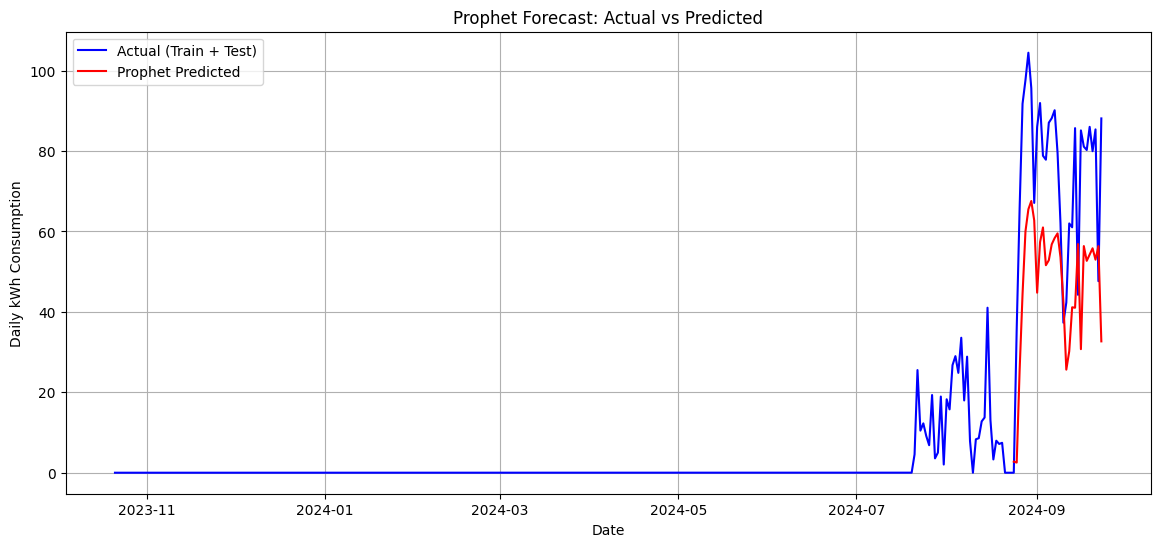

In [81]:
# Plot Actual vs Predicted

plt.figure(figsize=(14,6))

# Plot full actual (train + test)
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual (Train + Test)', color='blue')
#plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual (Test)', color='green')

# Plot predicted on test
plt.plot(test['ds'], forecast_test['yhat'], label='Prophet Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Daily kWh Consumption')
plt.title('Prophet Forecast: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


19:53:40 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_10_data_user_2 =====
Test RMSE: 12.83


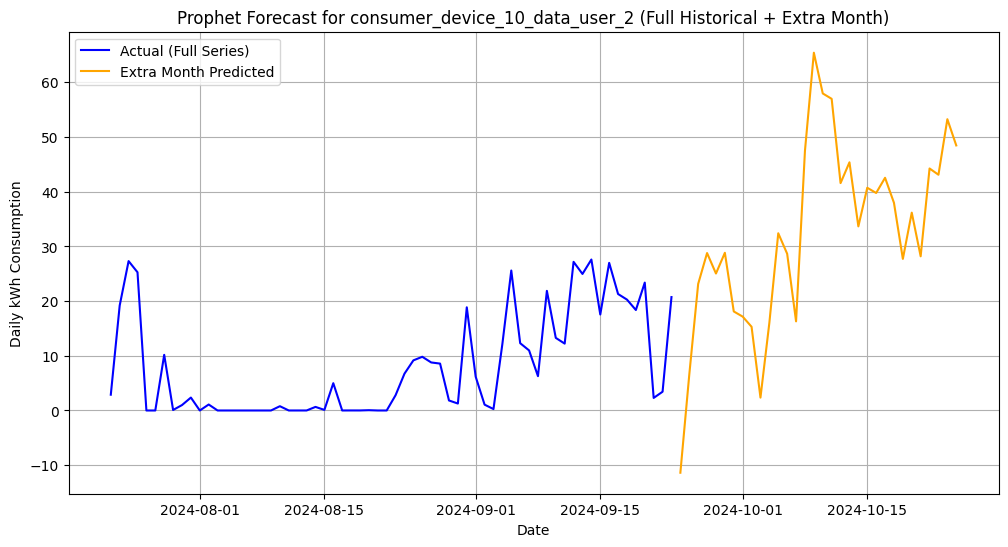

19:53:41 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_10_data_user_13 =====
Test RMSE: 1.55


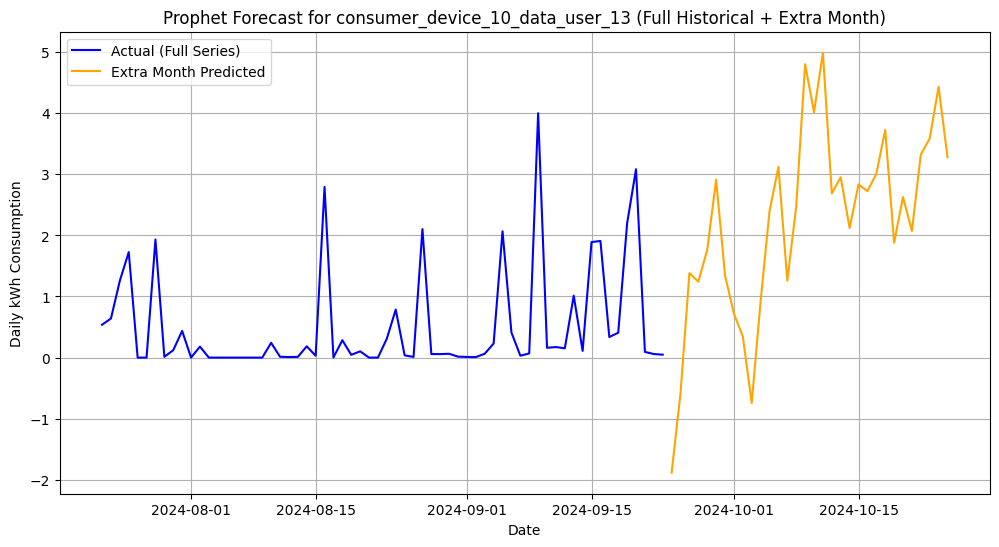

19:53:41 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_10_data_user_4 =====
Test RMSE: 5.89


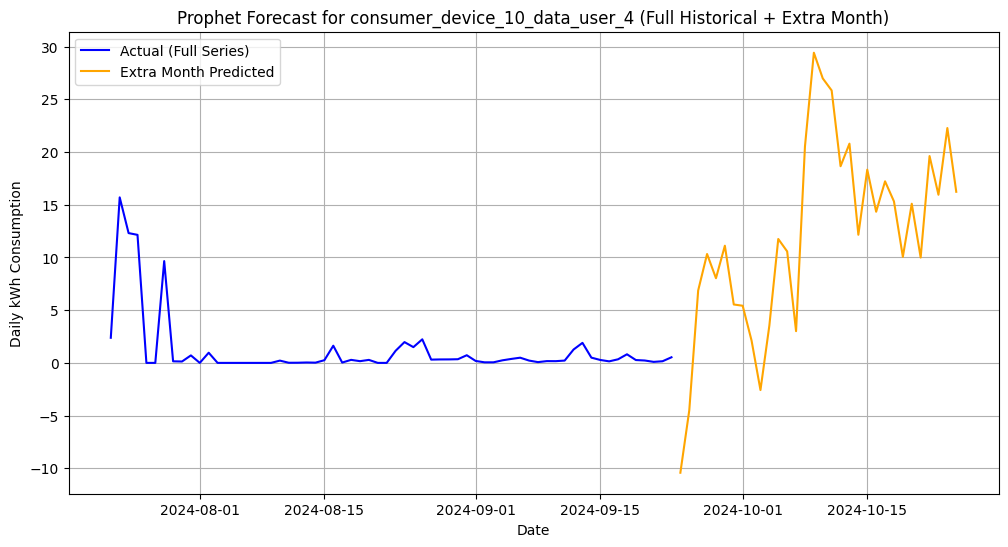

19:53:41 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_10_data_user_12 =====
Test RMSE: 3.93


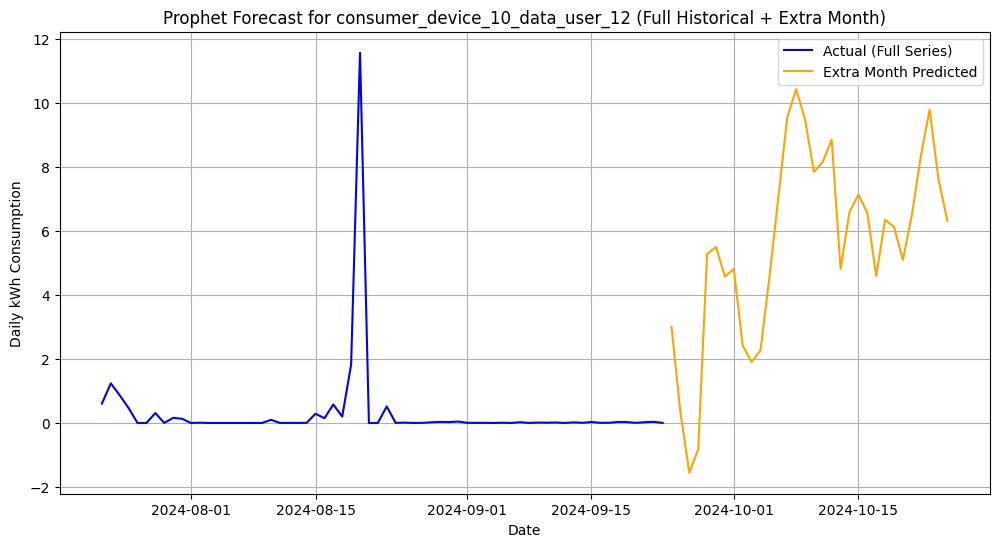

19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_8_data_user_9 =====
Test RMSE: 0.05


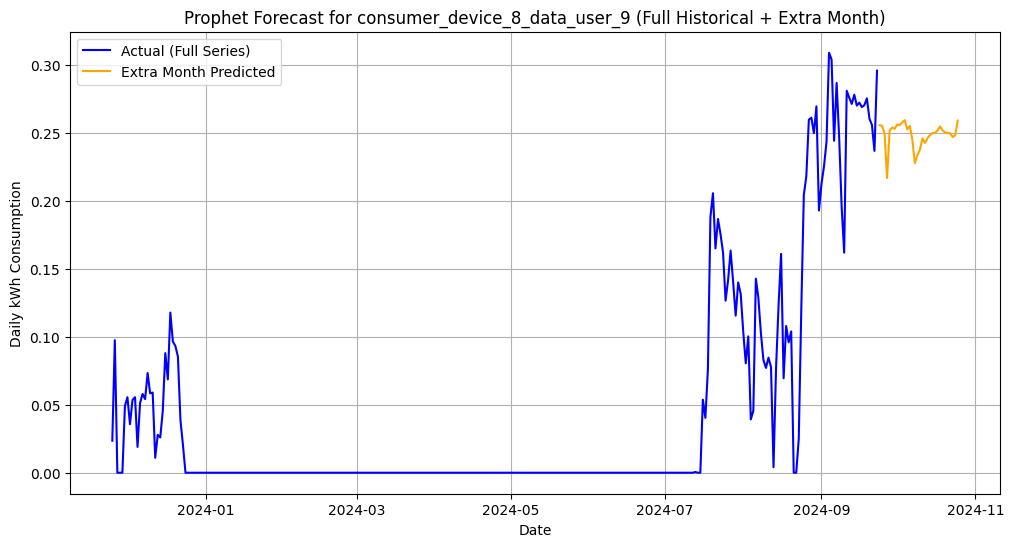

19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_13_data_user_4 =====
Test RMSE: 34.57


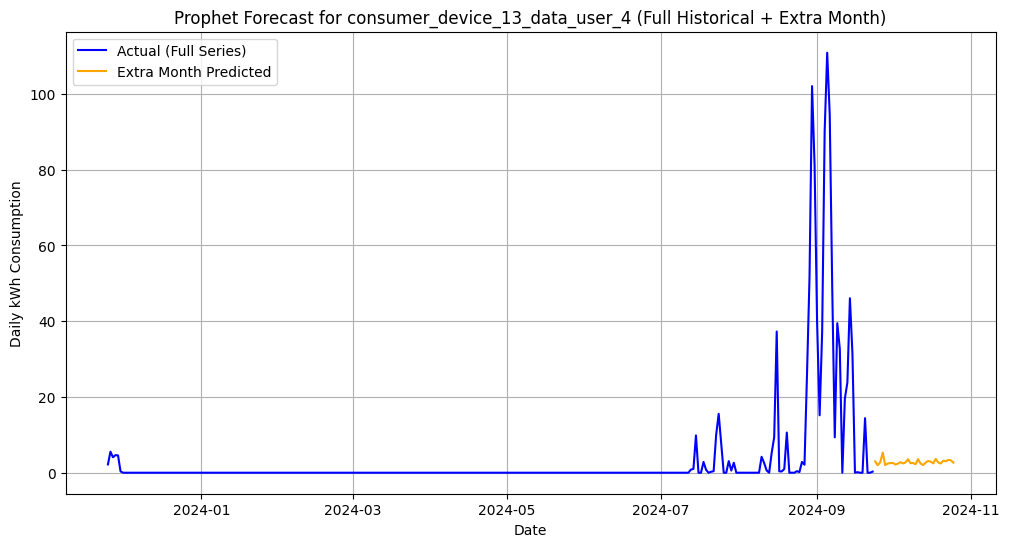

19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing



===== Processing consumer_device_22_data_user_2 =====
Test RMSE: 7.95


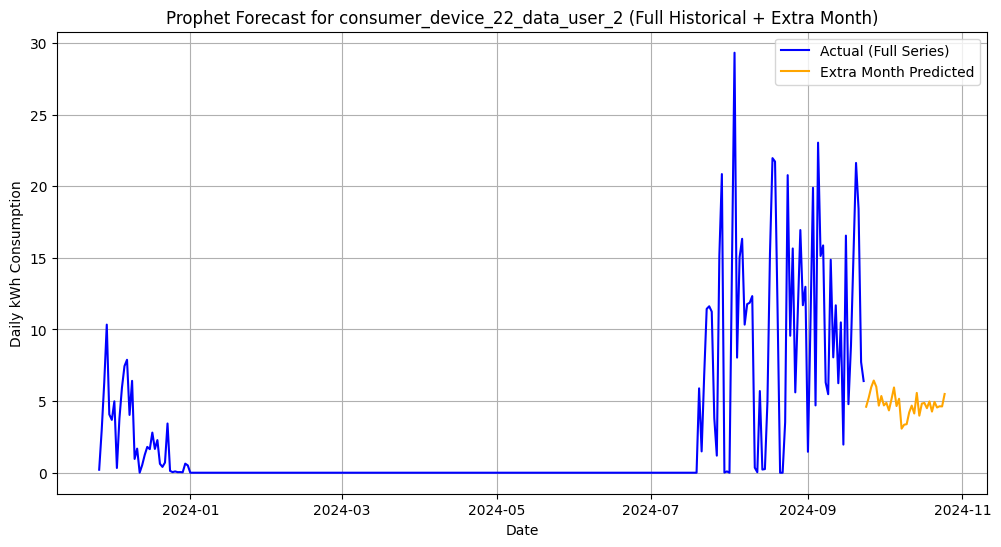


===== Processing consumer_device_22_data_user_4 =====


19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 7.03


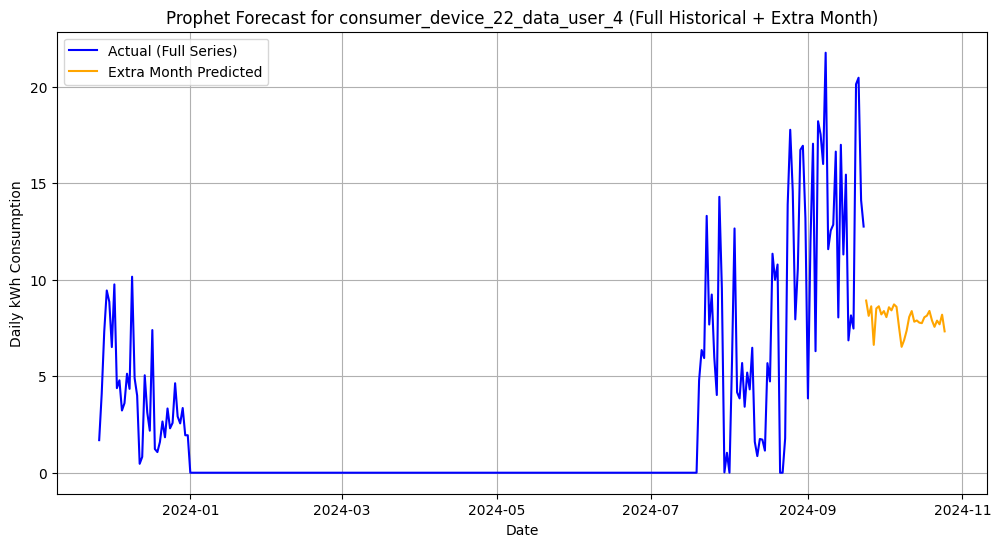

19:53:43 - cmdstanpy - INFO - Chain [1] start processing



===== Processing consumer_device_32_data_user_3 =====


19:53:43 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 0.42


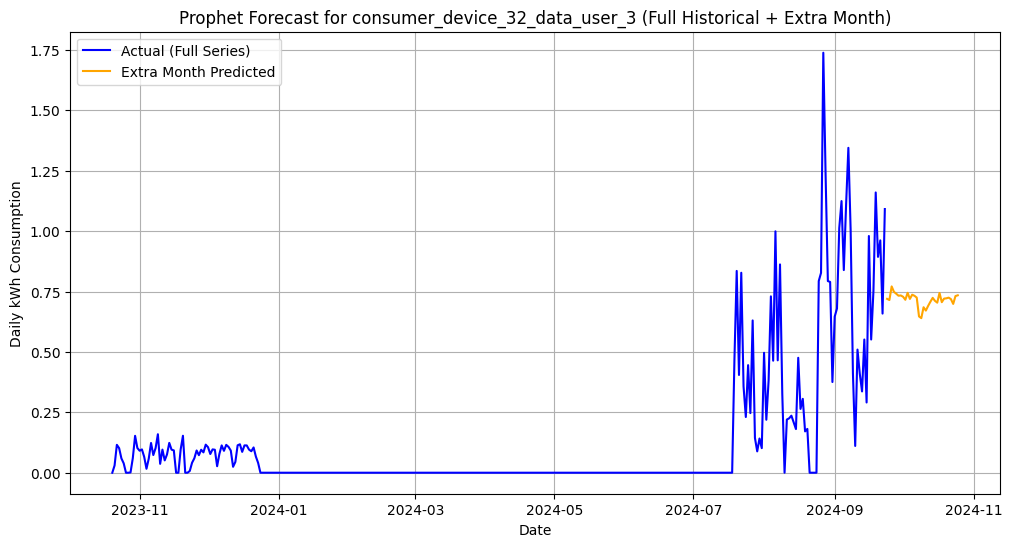


===== Processing consumer_device_32_data_user_19 =====


19:53:43 - cmdstanpy - INFO - Chain [1] start processing
19:53:43 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 31.24


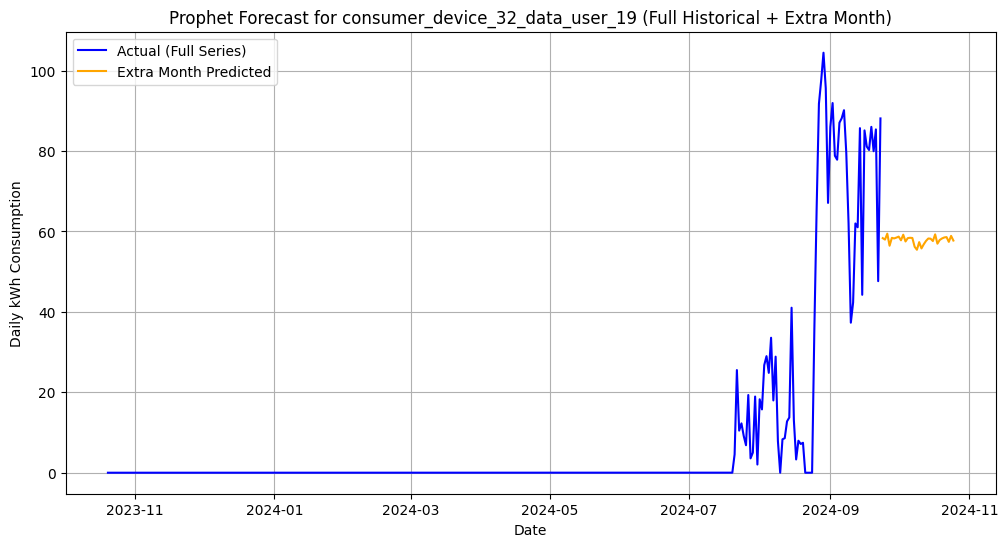

In [79]:
target = 'kwh_sum'
climate_features = [
    'Temperature (°C)_mean', 'Temperature (°C)_min', 'Temperature (°C)_max',
    'Dewpoint Temperature (°C)_mean', 'Dewpoint Temperature (°C)_min', 'Dewpoint Temperature (°C)_max',
    'U Wind Component (m/s)_mean', 'V Wind Component (m/s)_mean',
    'Total Precipitation (mm)_sum', 'Snowfall (mm)_sum', 'Snow Cover (%)_mean'
]

sources = [
    'consumer_device_10_data_user_2', 'consumer_device_10_data_user_13', 
    'consumer_device_10_data_user_4', 'consumer_device_10_data_user_12',
    'consumer_device_8_data_user_9', 'consumer_device_13_data_user_4',
    'consumer_device_22_data_user_2', 'consumer_device_22_data_user_4',
    'consumer_device_32_data_user_3', 'consumer_device_32_data_user_19'
]

# Loop over sources
for source in sources:
    print(f"\n===== Processing {source} =====")
    
    # Filter historical data for this source
    df_source = df_daily_merged[df_daily_merged['Source'] == source].copy()
    df_source['date'] = pd.to_datetime(df_source['date'])
    df_source = df_source.sort_values('date')
    

    # Lag1 feature for model training
    df_source['kwh_sum_lag1'] = df_source[target].shift(1)
    
    # Model DataFrame (drop NaN only for training/testing)
    df_model = df_source.dropna(subset=['kwh_sum_lag1']).reset_index(drop=True)
    
    # Rename for Prophet
    prophet_df = df_model.rename(columns={'date':'ds', target:'y'})
    
    # Train/Test split
    train = prophet_df[prophet_df['ds'] <= '2024-08-23']
    test  = prophet_df[(prophet_df['ds'] >= '2024-08-24') & (prophet_df['ds'] <= '2024-09-23')]
    

    # Prophet model (climate + lag1)
    m = Prophet()
    for col in climate_features + ['kwh_sum_lag1']:
        m.add_regressor(col)
    
    m.fit(train[['ds','y'] + climate_features + ['kwh_sum_lag1']])
    
    # Predict test
    forecast_test = m.predict(test[['ds'] + climate_features + ['kwh_sum_lag1']])
    rmse = sqrt(mean_squared_error(test['y'], forecast_test['yhat']))
    print(f"Test RMSE: {rmse:.2f}")
    

    # Extra month forecast
    df_extra_source = df_extra_month.copy()  # climate features only
    df_extra_source['ds'] = pd.to_datetime(df_extra_source['date'])
    
    # Use last day of history as lag1 for all extra month days
    last_kwh = df_source[target].iloc[-1]
    df_extra_source['kwh_sum_lag1'] = last_kwh
    
    # Select columns for prediction
    predictors = ['ds'] + climate_features + ['kwh_sum_lag1']
    df_extra_source[predictors[1:]] = df_extra_source[predictors[1:]].fillna(0)
    
    # Predict extra month
    forecast_extra = m.predict(df_extra_source[predictors])
    

    # Plot full historical + extra month
    plt.figure(figsize=(12,6))
    
    # Historical actuals (full series)
    plt.plot(df_source['date'], df_source[target], label='Actual (Full Series)', color='blue')
    
    # Extra month predicted
    plt.plot(forecast_extra['ds'], forecast_extra['yhat'], label='Extra Month Predicted', color='orange')
    
    plt.xlabel('Date')
    plt.ylabel('Daily kWh Consumption')
    plt.title(f'Prophet Forecast for {source} (Full Historical + Extra Month)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Ensure df_extra_month contains the extra month dates and climate features
df_extra_month['ds'] = pd.to_datetime(df_extra_month['date'])

# Get all unique sources
all_sources = df_daily_merged['Source'].unique()

submission_rows = []

for source in all_sources:
    # Historical data for this source
    df_source = df_daily_merged[df_daily_merged['Source'] == source].copy()
    df_source['date'] = pd.to_datetime(df_source['date'])
    df_source = df_source.sort_values('date')
    
    # Use last known kWh as lag1 for the future
    last_kwh = df_source['kwh_sum'].iloc[-1]
    
    # Prepare future dataframe
    df_future = df_extra_month.copy()
    df_future['kwh_sum_lag1'] = last_kwh
    
    # Fill missing climate features if any
    df_future[climate_features] = df_future[climate_features].fillna(0)
    
    # Predict using trained Prophet model
    predictors = ['ds'] + climate_features + ['kwh_sum_lag1']
    forecast_extra = m.predict(df_future[predictors])
    
    # Build submission rows
    for ds, yhat in zip(forecast_extra['ds'], forecast_extra['yhat']):
        submission_rows.append({
            'ID': f"{ds.date()}_{source}",
            'kwh': round(yhat, 2)
        })

# Create submission DataFrame
submission_df = pd.DataFrame(submission_rows)

# Save to CSV
submission_df.to_csv('prophet_submission_all_sources.csv', index=False)
print("Submission file saved as prophet_submission_all_sources.csv")


/var/folders/86/pr4crxy17sb_6r9w9xx0v3rw0000gn/T/ipykernel_2518/2086262551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extra_month['ds'] = pd.to_datetime(df_extra_month['date'])


Submission file saved as prophet_submission_all_sources.csv
